# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow==2.10.0 tensorflow-gpu==2.10.0 opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.1.1
[notice] To update, run: C:\Users\mahya\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
agents                        1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
albumentations                1.3.1
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [1]:
import tensorflow as tf
import os ##resturing data using our os - things we need inside folders

In [2]:
# Avoid OOM(out of memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True) ##limiting GPU -keep it to minimum or as much as you need-

In [3]:
##tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [4]:
import cv2 ##openCV
import imghdr ##check the extecntions

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): ##looping over every folder we got inside our data directory
    for image in os.listdir(os.path.join(data_dir, image_class)): ##every image in sub directrory
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path) ## load into open cv
            tip = imghdr.what(image_path) ##image maches one of exts
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
tf.data.Dataset??

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
tf.keras.utils.image_dataset_from_directory??

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data') ##automatically reshapes our images

Found 796 files belonging to 5 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
len(batch) ##2 cuz these is images and labels

2

In [16]:
# image represented as numpy arays
batch[0].shape

(32, 256, 256, 3)

In [17]:
# Class 0 = Drones
# Class 1 = humanids
# Class 2 = Serial manipulators
# Class 3 = Pararell manipulators
# Class 4 = Mobile robots

batch[1]

array([4, 2, 0, 2, 2, 0, 4, 1, 0, 1, 2, 3, 3, 3, 1, 1, 2, 0, 3, 0, 0, 3,
       4, 2, 4, 0, 2, 4, 1, 3, 1, 1])

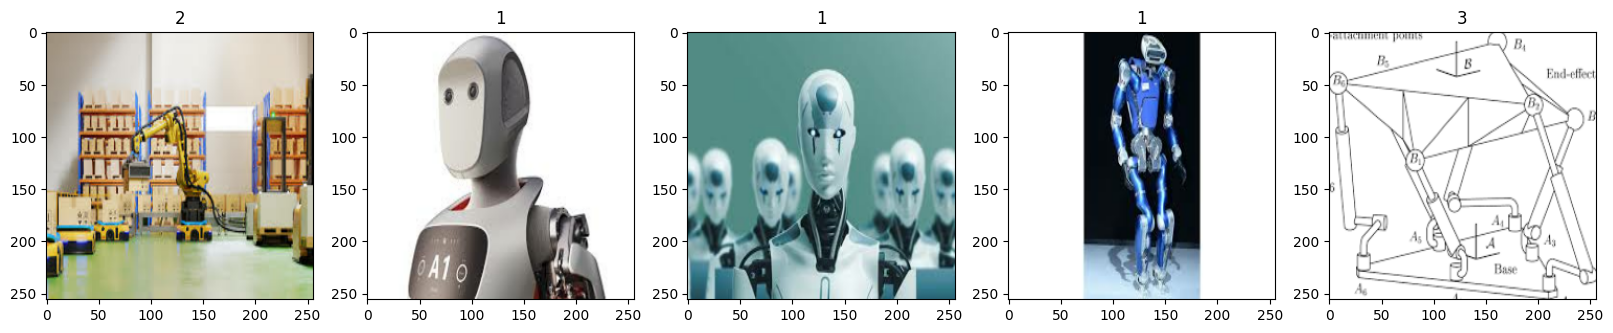

In [109]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Found 796 files belonging to 5 classes.


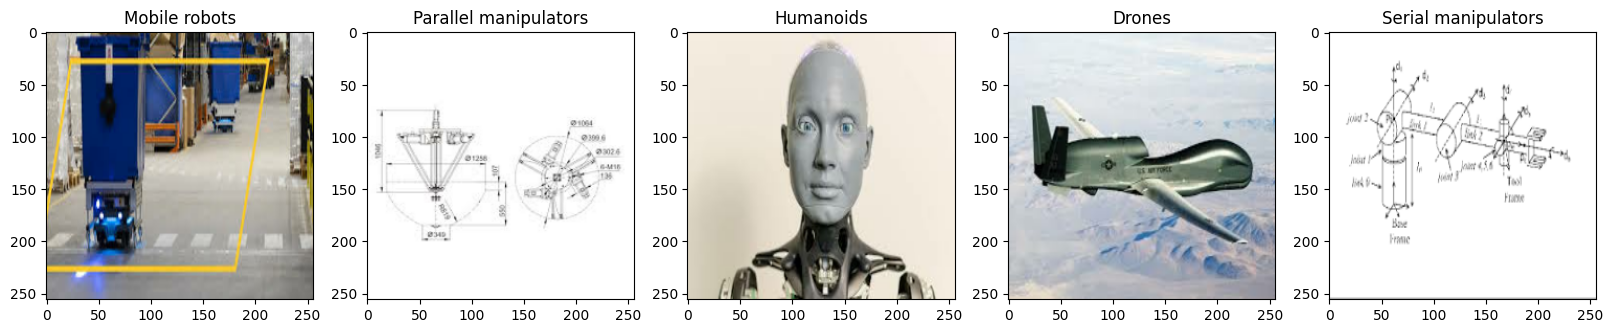

In [22]:
class_names = ['Drones', 'Humanoids',  'Mobile robots', 'Parallel manipulators','Serial manipulators']

# Load dataset
data = tf.keras.utils.image_dataset_from_directory('data')

# Convert dataset to numpy for easier manipulation
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Dictionary to keep track of one image per class
class_images = {}
class_labels = {}

# Loop through the batch to get one image per class
for img, label in zip(batch[0], batch[1]):
    if label not in class_images:
        class_images[label] = img
        class_labels[label] = class_names[label]
    # Break the loop if we have all classes
    if len(class_images) == len(class_names):
        break


fig, ax = plt.subplots(ncols=len(class_names), figsize=(20, 20))
for idx, (label, img) in enumerate(class_images.items()):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_labels[label])

plt.show()

# 4. Scale Data

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.9995251 , 0.9995251 , 0.9995251 ],
          [0.99952

# 5. Split Data

In [25]:
# number of batches
len(data)

25

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.15)
test_size = int(len(data)*.15) 

In [27]:
train_size

17

In [57]:
test_size

3

In [28]:
train = data.take(train_size) 
# skip the batches that were allocated
# take the rest batches
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [29]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [175]:
model = Sequential()

In [176]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(5, activation='softmax'))

In [177]:
model.compile(optimizer='adam', 
              loss=SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [178]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [179]:
logdir='logs'

In [180]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [181]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
17/17 [==============================] - 2s 90ms/step - loss: 1.5885 - accuracy: 0.2665 - val_loss: 1.4285 - val_accuracy: 0.3333
Epoch 2/20
17/17 [==============================] - 1s 82ms/step - loss: 1.4083 - accuracy: 0.4191 - val_loss: 1.2165 - val_accuracy: 0.4896
Epoch 3/20
17/17 [==============================] - 1s 81ms/step - loss: 1.2208 - accuracy: 0.5110 - val_loss: 1.2183 - val_accuracy: 0.5833
Epoch 4/20
17/17 [==============================] - 1s 80ms/step - loss: 1.0016 - accuracy: 0.6434 - val_loss: 0.9806 - val_accuracy: 0.6146
Epoch 5/20
17/17 [==============================] - 1s 82ms/step - loss: 0.8089 - accuracy: 0.7298 - val_loss: 1.3305 - val_accuracy: 0.6146
Epoch 6/20
17/17 [==============================] - 1s 82ms/step - loss: 0.6175 - accuracy: 0.7904 - val_loss: 0.7394 - val_accuracy: 0.7917
Epoch 7/20
17/17 [==============================] - 2s 81ms/step - loss: 0.5274 - accuracy: 0.8419 - val_loss: 0.8864 - val_accuracy: 0.7812
Epoch 8/20
17

# 8. Plot Performance

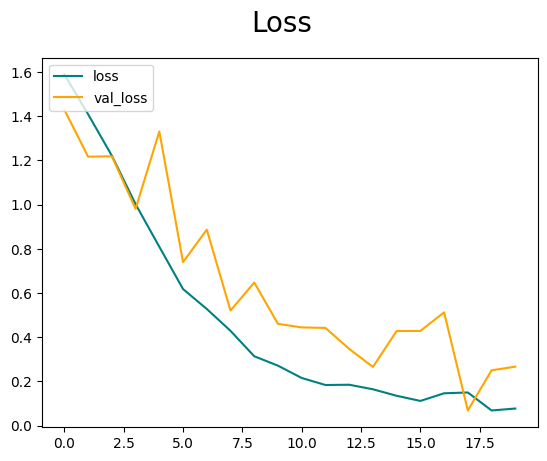

In [182]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

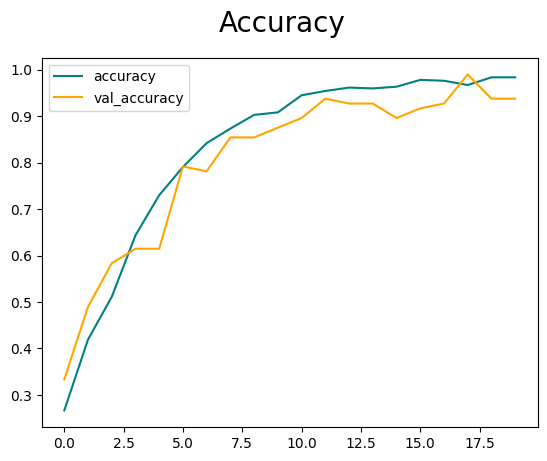

In [183]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [184]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [185]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [186]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Convert predictions to class labels
    yhat = tf.argmax(yhat, axis=1)
    
    # Update metrics with the true and predicted labels
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 32ms/step


# 10. Test

In [188]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{ acc.result().numpy()}')

Precision:0.9733333587646484, Recall:0.9864864945411682, Accuracy:0.6666666865348816


In [163]:
import cv2

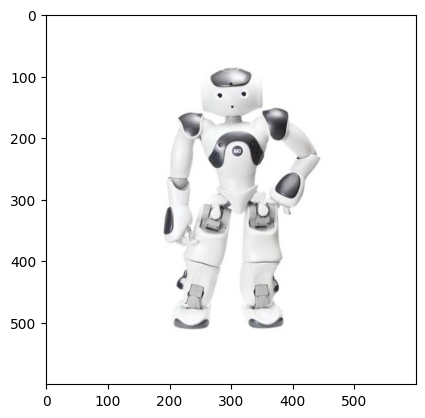

In [164]:
image_dir = r'D:\ut stuff\S8\Mechatronics\HW\6\Q6_samples_of_benchmark'

# Example image filename
image_filename = '1_2.jpg'

# Construct the full path to the image
img_path = os.path.join(image_dir, image_filename)

# Load the image using OpenCV
img = cv2.imread(img_path)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

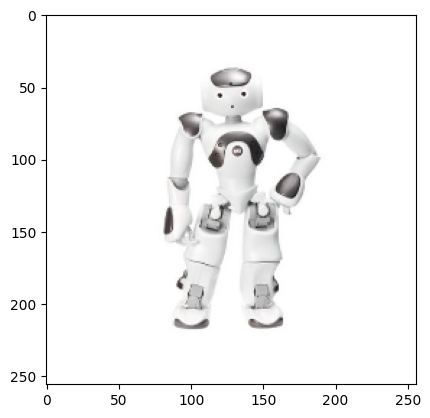

In [99]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [169]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [170]:
yhat

array([[1.7643757e-03, 9.9526840e-01, 9.9418638e-04, 8.6956006e-04,
        1.1033738e-03]], dtype=float32)

In [172]:
predicted_class = np.argmax(yhat)
class_labels = ['Class0', 'Class1', 'Class2', 'Class3', 'Class4']
class_labels_names = ['drone', 'humanoid', 'mobile robot', 'parallel manipulator', 'serial manipulator']

print(f'Predicted class is {class_labels[predicted_class]} which is a {class_labels_names[predicted_class]}')

Predicted class is Class1 which is a humanoid


# 7 samples

In [154]:



test_list = list(test.as_numpy_iterator())

images = []
labels_true = []

for batch in test_list:
    if len(images) >= 7:
        break
    
    X_batch, y_batch = batch
    batch_size = X_batch.shape[0]  # Number of images in the batch

    remaining_needed = 7 - len(images)
    images_to_pick = min(remaining_needed, batch_size)

    random_indices = np.random.choice(batch_size, images_to_pick, replace=False)

    for idx in random_indices:
        images.append(X_batch[idx])
        labels_true.append(y_batch[idx])


print(f"Selected {len(images)} images.")


Selected 7 images.


1/1 [==============================] - 0s 18ms/step


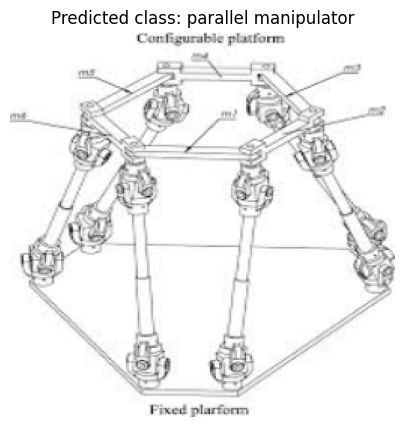

Predicted class is 3 which is a parallel manipulator
1/1 [==============================] - 0s 18ms/step


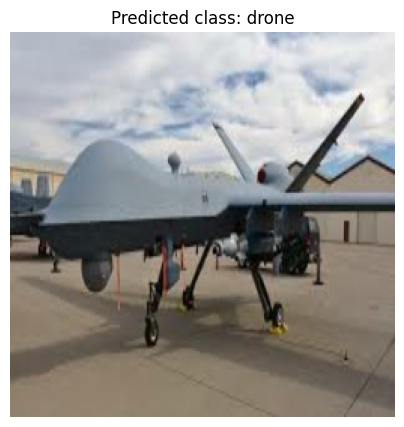

Predicted class is 0 which is a drone
1/1 [==============================] - 0s 18ms/step


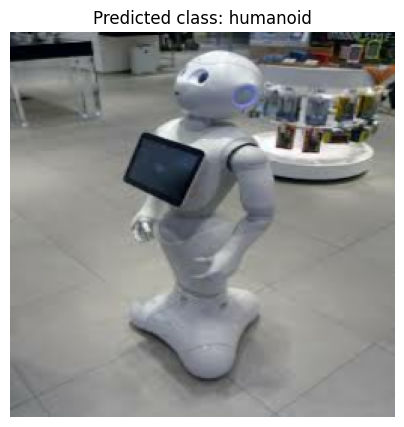

Predicted class is 1 which is a humanoid
1/1 [==============================] - 0s 19ms/step


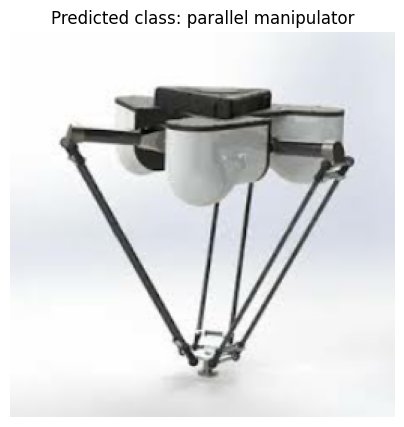

Predicted class is 3 which is a parallel manipulator
1/1 [==============================] - 0s 21ms/step


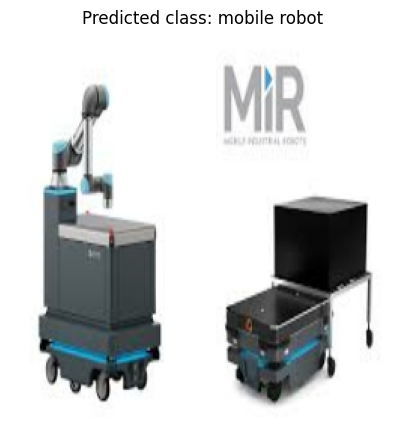

Predicted class is 2 which is a mobile robot
1/1 [==============================] - 0s 22ms/step


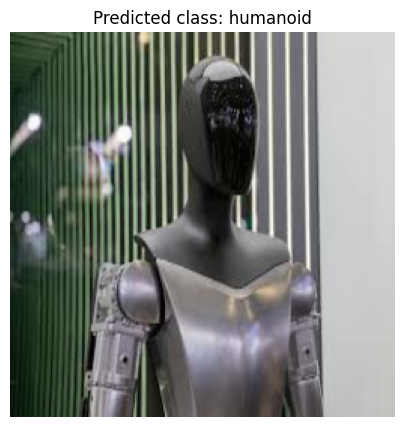

Predicted class is 1 which is a humanoid
1/1 [==============================] - 0s 19ms/step


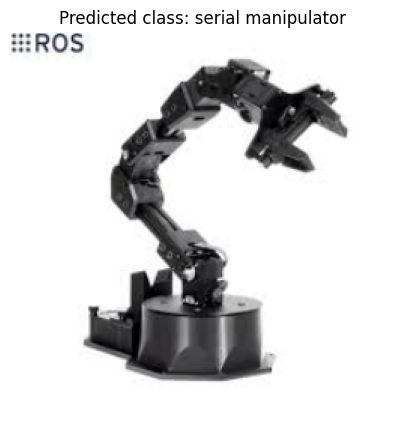

Predicted class is 4 which is a serial manipulator


In [155]:


yhat_list = []


for X_input in images:

    X_input = np.expand_dims(X_input, axis=0) 
    

    yhat = model.predict(X_input)
    

    yhat_list.append(yhat)
    

    predicted_class = np.argmax(yhat)
    

    plt.figure(figsize=(5, 5))
    plt.imshow(X_input[0])
    plt.title(f'Predicted class: {class_labels_names[predicted_class]}')
    plt.axis('off')
    plt.show()

    print(f'Predicted class is {predicted_class} which is a {class_labels_names[predicted_class]}')




# 11. Save the Model

In [165]:
from tensorflow.keras.models import load_model

In [166]:
model.save(os.path.join('models','robotclassifier.h5'))

In [167]:
new_model = load_model(os.path.join('models','robotclassifier.h5'))

In [168]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


array([[1.7643757e-03, 9.9526840e-01, 9.9418638e-04, 8.6956006e-04,
        1.1033738e-03]], dtype=float32)